# Reading in the data

we'll be working with a dataset from Capital Bikeshare that was used in a Kaggle competition [data dicrection]('https://www.kaggle.com/c/bike-sharing-demand/data')

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes=pd.read_csv(url, index_col='datetime',parse_dates=True)

In [2]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Questions:**
- What does each observation represent?
- What is the response varialbe(as defined by Kaggle)?
- How many features are there? 

In [3]:
bikes.rename(columns={'count':'total'}, inplace=True)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(8,6)
plt.rcParams['font.size']=14

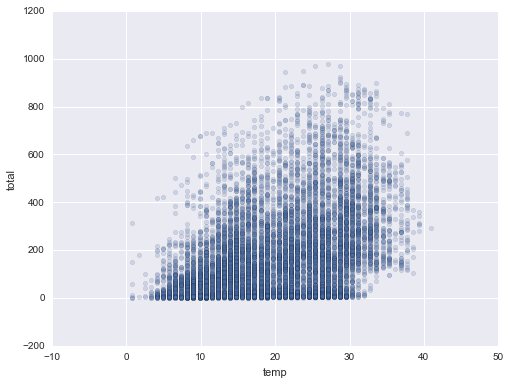

In [5]:
bikes.plot(kind='scatter', x='temp',y='total', alpha=0.2)

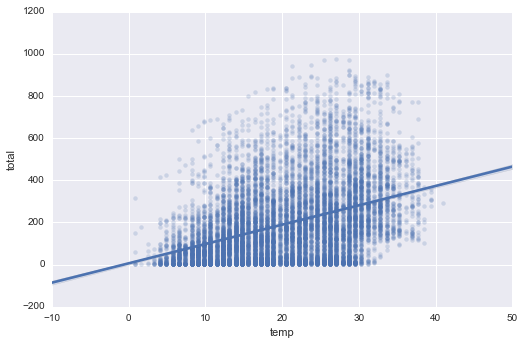

In [6]:
sns.lmplot(x='temp', y='total',data=bikes, aspect=1.5,scatter_kws={'alpha':0.2})

# Building a linear regression model


In [7]:
feature_cols=['temp']
X=bikes[feature_cols]
y=bikes.total

In [8]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
linreg.intercept_

6.0462129596166108

In [10]:
linreg.coef_

array([ 9.17054048])

Interpreting the **intercept**
- It is the value of y when x=0
- Thus, it is the estimate number of rentals when the temperature is 0
- **Note**: It does not always make sense to interpret the intercept.(Why?)

Interpreting the **"temp" coefficient:**
- It is the change in y divided by change in x, or the "slope".
- Thus, a temperature increase of 1 degree Celsius is **associated with ** a rental increase of 9.17 bikes. 
- This is not a statement of causation.
- beta1 would be **negative** if an increase in temperature was associated with a **decrease ** in rentals. 

In [11]:
linreg.predict(25)

array([ 235.309725])

# Does the scale of the features matter?

Let's say that temperature was measured in Fahrenheit, rather than Celsius. How would that affect the model?

In [12]:
bikes['temp_F']=bikes.temp*1.8+32

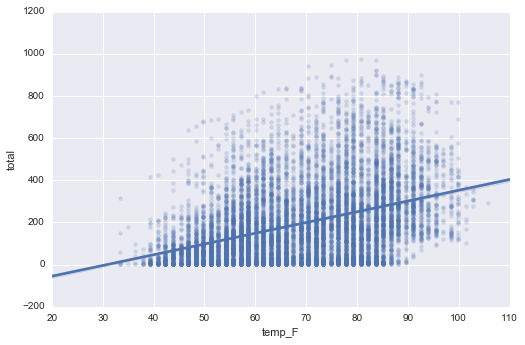

In [13]:
sns.lmplot(x='temp_F',y='total',data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

In [14]:
feature_col=['temp_F']
X=bikes[feature_col]
y=bikes.total

In [15]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
linreg.intercept_

-156.98561782129258

In [17]:
25*1.8+32

77.0

In [18]:
linreg.predict(77)

array([ 235.309725])

**Conclusion:** The scale of the feature is **irrelevant** for linear regression models. When changing the scale, we simply change our **interpretation** of the coefficients. 

In [19]:
bikes.drop('temp_F', axis=1,inplace=True)

# Visualizing the data (part 2)

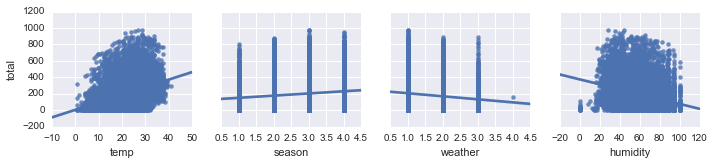

In [20]:
feature_col = ['temp','season','weather','humidity']
sns.pairplot(x_vars=feature_col,y_vars='total',data=bikes,kind='reg')

In [21]:
bikes.groupby(['season',bikes.index.month]).total.count()

season    
1       1     884
        2     901
        3     901
2       4     909
        5     912
        6     912
3       7     912
        8     912
        9     909
4       10    911
        11    911
        12    912
Name: total, dtype: int64

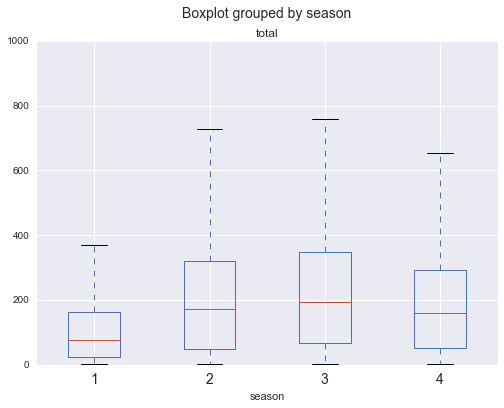

In [22]:
bikes.boxplot(column='total',by='season')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/seaborn/categorical.py:3376: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if legend and (hue is not None) and (hue not in [x, row, col]):


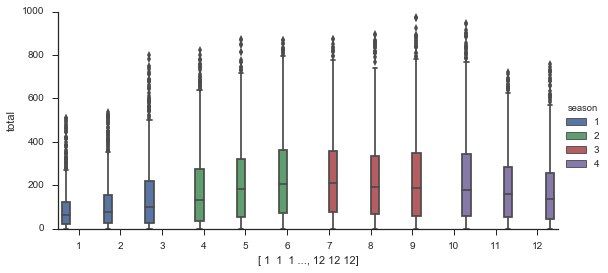

In [23]:
with sns.axes_style('ticks'):
    g = sns.factorplot(x=bikes.index.month,y='total',hue='season',data=bikes,kind='box',aspect=2)
 

Notably:
- A line can't capture a non-linear relationship
- There are more retntals in winter than in spring?

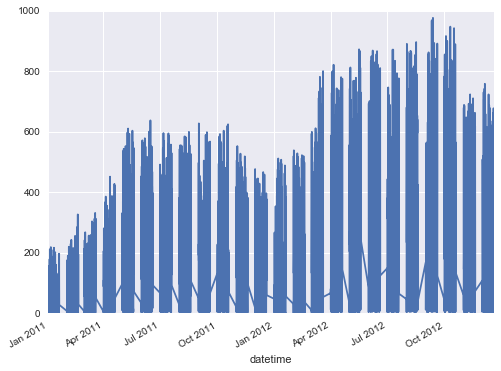

In [24]:
bikes.total.plot()

What does this tell us?

There are more rentals in the winter than the spring, but only because the system is experiencing **overall growth** and the winter months happen to come after the spring months. 

In [25]:
bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


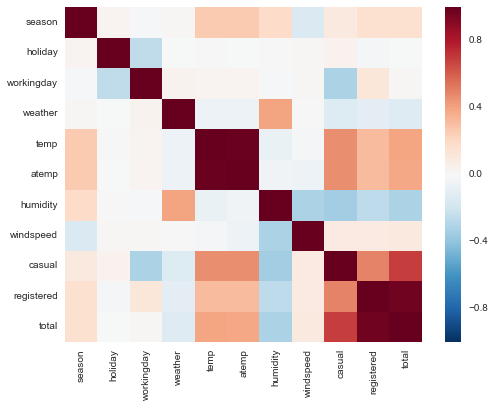

In [26]:
sns.heatmap(bikes.corr())

# Adding more feature to the model

In [27]:
feature_cols=['temp','season','weather','humidity']
X=bikes[feature_cols]
y=bikes.total

linreg = LinearRegression()
linreg.fit(X,y)
linreg.coef_

array([  7.86482499,  22.53875753,   6.67030204,  -3.11887338])

In [28]:
linreg.intercept_

159.52068786129752

In [29]:
list(zip(feature_cols,linreg.coef_))

[('temp', 7.8648249924774536),
 ('season', 22.538757532466729),
 ('weather', 6.670302035923747),
 ('humidity', -3.1188733823964943)]

Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in temperature is associated with a rental increase of 7.86 bikes
- Holding all other features fixed, a 1 unit increase in season is associated with a rental increase of 22.5 bikes.
- Holding all other features fixed, a 1 unit increase in weather is associated with a rental increase of 6.67. 
- Holding all other features fixed, a 1 unit incrreas in humidity is associated with a rental decrease of 3.12 bikes. 

# Feature selection
How do we choose which features to include in the model? We're going to use train/test split(and eventually cross-validation). 

Why not use **p-value** or **R-squared** for feature selection? 
- Linear models rely upon **a lot of assumptions**(such as the feature being independent), and if those assumptions are violated, p-values and R-squared are less reliable. Train/test split relies on fewer assumptions. 
- Features that are unrelated to the response can still have significant p-values.
- Adding features to your model that are unrelated to the responsed will always increase the R-squared value, and adjusted R-squared does not sufficiently account for this.
- p-values and R-squared are **proxies** for our goal of generalization, whereas train/test split and  cross-validation, attempt to **directly estimate** how well the model will generalize to out-of-sample data. 


# Evaluation metrics for regression problems

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

Here are three common evaluation metrics for regression problems:

- **Mean Absolute Error**(MAE) is the mean of the absolute value of the errors: **abs(true-pred)/n**
- **Mean Squared Errors**(MSE) is the mean of the squared errors: **sum(true-pred)^2/n**
- **Root Mean Squared Error**(RMSE) is the square root of the mean of the squared errors: **root(MSE)**



In [30]:
true = [10, 7,5,5]
pred=[8,6,5,10]
from sklearn import metrics
import numpy as np
'MAE:', metrics.mean_absolute_error(true,pred)

('MAE:', 2.0)

In [31]:
'MSE:', metrics.mean_squared_error(true,pred)

('MSE:', 7.5)

In [32]:
'RMSE:', np.sqrt(metrics.mean_squared_error(true, pred))

('RMSE:', 2.7386127875258306)

Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" large errors, which tends to be useful in the real world. 
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units. 

All of these are **loss functions**, because we want to minimize them.

Here is an additional example, to demonstrate how MSE/RMSE punished large errors.


In [33]:
true = [10, 7, 5,5]
pred = [10, 7, 5, 13]
metrics.mean_absolute_error(true, pred)

2.0

In [34]:
metrics.mean_squared_error(true, pred)

16.0

In [35]:
np.sqrt(metrics.mean_squared_error(true, pred))

4.0

# Comparing models with train/test split and RMSE

In [36]:
from sklearn.cross_validation import train_test_split

def train_test_rmse(feature_cols):
    X=bikes[feature_cols]
    y=bikes.total
    X_train, X_test,y_train, y_test = train_test_split(X,y)
    linreg = LinearRegression()
    linreg.fit(X_train,y_train)
    y_pred=linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [37]:
train_test_rmse(['temp','season','weather','humidity'])

159.33127317265865

In [38]:
train_test_rmse(['temp','season','humidity'])

154.95025082070126

In [39]:
train_test_rmse(['temp','season','weather'])

164.65677705532565

In [40]:
train_test_rmse(['temp','humidity'])

155.1536083992485

# Comparing testing RMSE with null RMSE

In [41]:
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state=123)
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())
y_null

array([ 192.26451139,  192.26451139,  192.26451139, ...,  192.26451139,
        192.26451139,  192.26451139])

In [42]:
np.sqrt(metrics.mean_squared_error(y_test, y_null)) ## null RMSE

179.57906896465727

# Handling Categorical Features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?
- Ordered categories: transform them to sensible numeric values(sg. small =1, medium = 2, large =3)
- Unordered categories: use dummy encoding(0/1)

In [43]:
season_dummies = pd.get_dummies(bikes.season, prefix="season")

In [44]:
season_dummies.sample(n=5, random_state=1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,0.0,0.0,1.0,0.0
2012-03-18 04:00:00,1.0,0.0,0.0,0.0
2012-10-14 17:00:00,0.0,0.0,0.0,1.0
2011-04-04 15:00:00,0.0,1.0,0.0,0.0
2012-12-11 02:00:00,0.0,0.0,0.0,1.0


In [45]:
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

In [46]:
season_dummies.sample(n=5, random_state=1)

,season_2,season_3,season_4
datetime,,,
2011-09-05 11:00:00,0.0,1.0,0.0
2012-03-18 04:00:00,0.0,0.0,0.0
2012-10-14 17:00:00,0.0,0.0,1.0
2011-04-04 15:00:00,1.0,0.0,0.0
2012-12-11 02:00:00,0.0,0.0,1.0


In general, if you have a categorical feature with k possible values, you create **k-1 dummy variables**. 

In [47]:
bikes=pd.concat([bikes,season_dummies],axis=1)

In [48]:
bikes.sample(n=5, random_state=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,0.0,1.0,0.0
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,0.0,0.0,0.0
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,0.0,0.0,1.0
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,1.0,0.0,0.0
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,0.0,0.0,1.0


In [49]:
feature_cols=['temp', 'season_2', 'season_3', 'season_4', 'humidity']

In [50]:
X = bikes[feature_cols]
y = bikes.total
linreg=LinearRegression()
linreg.fit(X,y)
dict(zip(feature_cols, linreg.coef_))

{'humidity': -2.8194816362596544,
 'season_2': -3.3905430997184389,
 'season_3': -41.736860713171573,
 'season_4': 64.415961468241719,
 'temp': 11.186405863575832}

How do we interpret the season coefficients? They are **measured against the baseline(spring):**
- Holding all other features fixed, summer is associated with a **rental decrease of 3.39 bikes** compared to the spring.
- Holding all other features fixed, **fall** is associated with a **rental decrease of 41.7 bikes** compared to the spring. 
- Holding all other features fixed, **winter** is associated with a **rental increase of 64.4 bikes** compared to the spring. 

Would it matter if we changed which season was defined as the baseline? 
- No, it would simply change our interpretation of the coefficients. 




In [51]:
train_test_rmse(['temp','season_2','season_3','season_4','humidity'])

152.25231160136906

# Feature Engineering 
See if you can create the following features:
- **Hour**: as a single numeric feature (0 through 23)
- **Hour**: as a categorical feature (use 23 dummy variables)
- **Daytime**:as a single categorical feature(daytime=1 from 7am to 8pm, and daytime =0 otherwise)

Then, try using each of the three features (on its own)with train_test_rmse to see  which one performs the best!


In [52]:
bikes['hours'] = bikes.index.hour ## hour as a numeric feature
bikes.hours

datetime
2011-01-01 00:00:00     0
2011-01-01 01:00:00     1
2011-01-01 02:00:00     2
2011-01-01 03:00:00     3
2011-01-01 04:00:00     4
2011-01-01 05:00:00     5
2011-01-01 06:00:00     6
2011-01-01 07:00:00     7
2011-01-01 08:00:00     8
2011-01-01 09:00:00     9
2011-01-01 10:00:00    10
2011-01-01 11:00:00    11
2011-01-01 12:00:00    12
2011-01-01 13:00:00    13
2011-01-01 14:00:00    14
2011-01-01 15:00:00    15
2011-01-01 16:00:00    16
2011-01-01 17:00:00    17
2011-01-01 18:00:00    18
2011-01-01 19:00:00    19
2011-01-01 20:00:00    20
2011-01-01 21:00:00    21
2011-01-01 22:00:00    22
2011-01-01 23:00:00    23
2011-01-02 00:00:00     0
2011-01-02 01:00:00     1
2011-01-02 02:00:00     2
2011-01-02 03:00:00     3
2011-01-02 04:00:00     4
2011-01-02 06:00:00     6
                       ..
2012-12-18 18:00:00    18
2012-12-18 19:00:00    19
2012-12-18 20:00:00    20
2012-12-18 21:00:00    21
2012-12-18 22:00:00    22
2012-12-18 23:00:00    23
2012-12-19 00:00:00     0
201

In [53]:
## hour as a categorical feature
hour_dummies = pd.get_dummies(bikes.hours, prefix='hour')
hour_dummies.drop(hour_dummies.columns[0], axis=1, inplace=True)
bikes=pd.concat([bikes,hour_dummies], axis=1)

In [54]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
bikes['daytime']=((bikes.hours>6) & (bikes.hours<21)).astype(int)

In [56]:
bikes['daytime']

datetime
2011-01-01 00:00:00    0
2011-01-01 01:00:00    0
2011-01-01 02:00:00    0
2011-01-01 03:00:00    0
2011-01-01 04:00:00    0
2011-01-01 05:00:00    0
2011-01-01 06:00:00    0
2011-01-01 07:00:00    1
2011-01-01 08:00:00    1
2011-01-01 09:00:00    1
2011-01-01 10:00:00    1
2011-01-01 11:00:00    1
2011-01-01 12:00:00    1
2011-01-01 13:00:00    1
2011-01-01 14:00:00    1
2011-01-01 15:00:00    1
2011-01-01 16:00:00    1
2011-01-01 17:00:00    1
2011-01-01 18:00:00    1
2011-01-01 19:00:00    1
2011-01-01 20:00:00    1
2011-01-01 21:00:00    0
2011-01-01 22:00:00    0
2011-01-01 23:00:00    0
2011-01-02 00:00:00    0
2011-01-02 01:00:00    0
2011-01-02 02:00:00    0
2011-01-02 03:00:00    0
2011-01-02 04:00:00    0
2011-01-02 06:00:00    0
                      ..
2012-12-18 18:00:00    1
2012-12-18 19:00:00    1
2012-12-18 20:00:00    1
2012-12-18 21:00:00    0
2012-12-18 22:00:00    0
2012-12-18 23:00:00    0
2012-12-19 00:00:00    0
2012-12-19 01:00:00    0
2012-12-19 02:00

In [57]:
train_test_rmse(['hours'])

168.93938945051687

In [58]:
train_test_rmse(bikes.columns[bikes.columns.str.startswith('hour_')])

126.83202202817455

In [59]:
bikes.columns[bikes.columns.str.startswith('hour_')]

Index(['hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [60]:
bikes.columns.str.startswith('hour_')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False], dtype=bool)

In [61]:
train_test_rmse(['daytime'])

145.5085500055736

# Comparing linear regression with other models 

Advantage of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tunning is required(excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Well-understood

Disadvantages of linear regression:

- Presumes a linear relationship between the feature and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Can't automatically learn feature interactions